## Observations and Insights 

# 1.The correlation of 0.59 shows a strong relationship between average tumor volume and mouse weight. 2.Both Ramicane and Capomulin had the most data point in the study.3. Finally, these two drugs appeared to be the most appropriate to  to cure the tumor.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df= pd.merge(mouse_metadata_df,study_results_df,how='outer')

# Display the data table for preview
combined_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
Number_of_mice=len(combined_data_df["Mouse ID"].unique())
Number_of_mice


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated= combined_data_df.loc[combined_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"]
duplicated


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID.

combined_data_df.loc[combined_data_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[combined_data_df["Mouse ID"]!= "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
Number_of_mice=len(clean_df["Mouse ID"].unique())
Number_of_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_data=clean_df.groupby("Drug Regimen")
mean_group_data=group_data.mean()["Tumor Volume (mm3)"]
median_group_data=group_data.median()["Tumor Volume (mm3)"]
variance_group_data=group_data.var()["Tumor Volume (mm3)"]
std_deviation_group_data=group_data.std()["Tumor Volume (mm3)"]
sem_group_data=group_data.sem()["Tumor Volume (mm3)"]
Summary_df=pd.DataFrame({
"Mean":mean_group_data, 
"Median":median_group_data,
"Variance":variance_group_data,
"standard deviation":std_deviation_group_data,
"SEM":sem_group_data
})
Summary_df

,Mean,Median,Variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_df=group_data.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

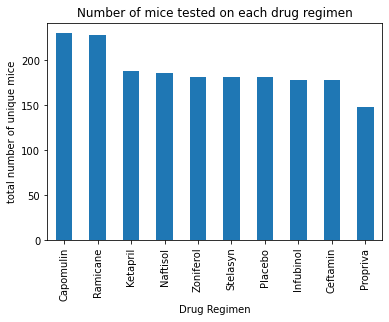

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count=clean_df["Drug Regimen"].value_counts()
count.plot(kind="bar")
plt.title("Number of mice tested on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("total number of unique mice")
plt.show()

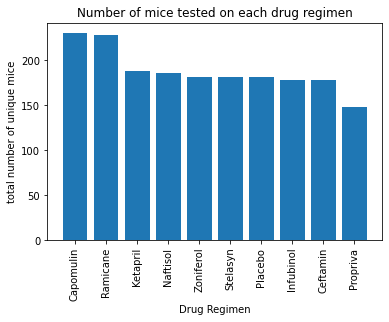

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(count.index.values,count.values)
plt.xticks(rotation=90)
plt.title("Number of mice tested on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("total number of unique mice")
plt.show()


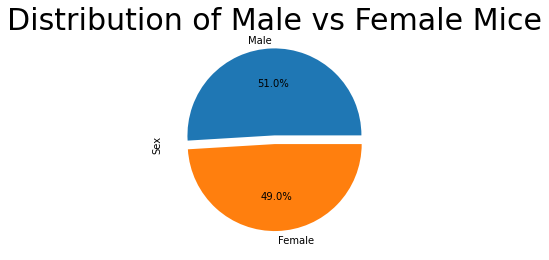

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

count=clean_df["Sex"].value_counts()
explode = (0.1, 0)
count.plot(kind="pie", autopct="%1.1f%%", explode = explode,)
plt.title("Distribution of Male vs Female Mice", fontsize=30)
plt.show()

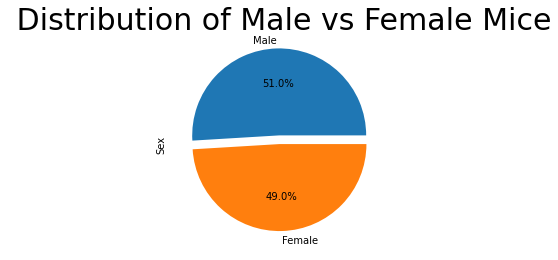

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count.values,labels=count.index.values, autopct="%1.1f%%", explode = explode)
plt.ylabel("Sex")
plt.title(" Distribution of Male vs Female Mice", fontsize=30)
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse

last_timepoint=clean_df.groupby("Mouse ID").max()[["Timepoint"]]
last_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_new_data=pd.merge(last_timepoint,clean_df,on=["Mouse ID","Timepoint"],how='left')
merge_new_data

selected_regimen_df = merge_new_data[merge_new_data['Drug Regimen'].isin(selected_regimen)]
selected_regimen_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [33]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
        final_volume=merge_new_data.loc[merge_new_data["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]

        # add subset 
        tumor_vol_data.append(final_volume)

        # Determine outliers using upper and lower bounds
        quartiles = final_volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print(f"The lower quartile of {treatment} is: {lowerq}")
        print(f"The upper quartile of {treatment} is: {upperq}")
        print(f"The interquartile range of {treatment} is: {iqr}")
        print(f"The the median of {treatment} is: {quartiles[0.5]} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile rang

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd508275a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd508283190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd508275730>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd508283850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd508283bb0>,
 'means': []}

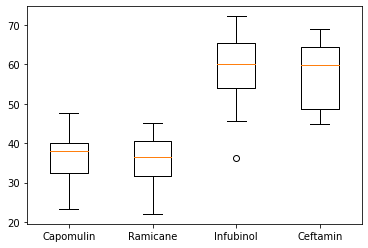

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data,labels=treatments)

## Line and Scatter Plots

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
line_df.head()

# "l509"

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<AxesSubplot:xlabel='Timepoint'>

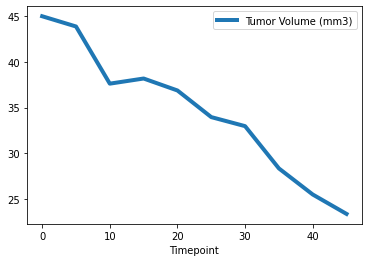

In [73]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_specific = line_df.loc[line_df["Mouse ID"]=="s185"] 
mouse_specific
mouse_specific.plot.line (x='Timepoint', y='Tumor Volume (mm3)', linewidth=4) 

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

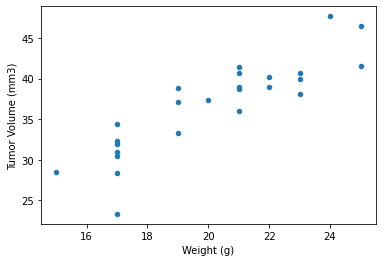

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight=merge_new_data.loc[merge_new_data["Drug Regimen"]=="Capomulin"]
mouse_weight.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.59


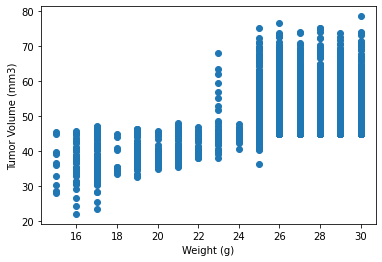

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Mouse_weight = combined_data_df ["Weight (g)"]
Average_tumor_volume = combined_data_df ["Tumor Volume (mm3)"]

correlation = st.pearsonr(Mouse_weight,Average_tumor_volume)
plt.scatter(Mouse_weight,Average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()
